# classifcation of heart diseases

In [1]:
#0-- no heart disease
#1-- having heart disease

In [2]:
## data information
""""1. age 
2. sex = 1-->male and 0-->female 
3. cp--chest pain 
 --Value 1 = typical angina 
 --Value 2 = atypical angina 
 --Value 3 = non-anginal pain 
 --Value 4 = asymptomatic 
4. trestbps = resting blood pressure (in mm Hg on admission to the hospital) 
5. serum cholesterol in mg/dl 
6. FBS (fasting blood sugar > 120 mg/dl) = 1-->true and 0-->false 
7. restecg = resting electrocardiographic results 
8. thalach = maximum heart rate achieved 
9. exang = exercise induced angina, 1-->true and 0-->false 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope of the peak exercise ST segment 
12. ca = number of major vessels (0-3) coloured by flouroscopy 
13. thal = 3-->normal, 6-->fixed defect,7-->= reversable defect 
14. target= heart diseases 
 0--> No heart disease 
 1--> having heart disease"""


'"1. age \n2. sex = 1-->male and 0-->female \n3. cp--chest pain \n --Value 1 = typical angina \n --Value 2 = atypical angina \n --Value 3 = non-anginal pain \n --Value 4 = asymptomatic \n4. trestbps = resting blood pressure (in mm Hg on admission to the hospital) \n5. serum cholesterol in mg/dl \n6. FBS (fasting blood sugar > 120 mg/dl) = 1-->true and 0-->false \n7. restecg = resting electrocardiographic results \n8. thalach = maximum heart rate achieved \n9. exang = exercise induced angina, 1-->true and 0-->false \n10. oldpeak = ST depression induced by exercise relative to rest \n11. slope of the peak exercise ST segment \n12. ca = number of major vessels (0-3) coloured by flouroscopy \n13. thal = 3-->normal, 6-->fixed defect,7-->= reversable defect \n14. target= heart diseases \n 0--> No heart disease \n 1--> having heart disease'

In [3]:
#importing python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading cvs file 
data=pd.read_csv("C:/Users/TRUPTI/Downloads/Project - 3 (1)/Project-3/heart.csv")
df=pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.size

4242

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

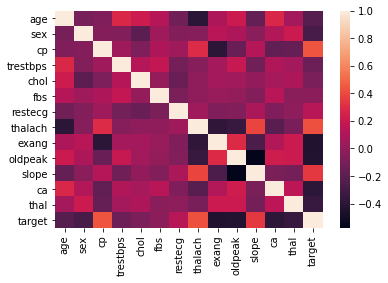

In [10]:
sns.heatmap(df.corr())

C:\Users\TRUPTI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='thalach'>

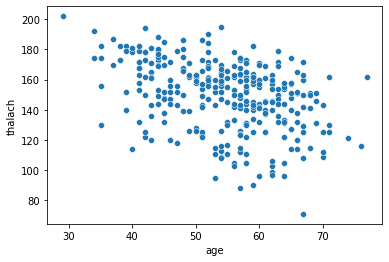

In [11]:
sns.scatterplot(df["age"],df["thalach"])

<AxesSubplot:xlabel='target', ylabel='count'>

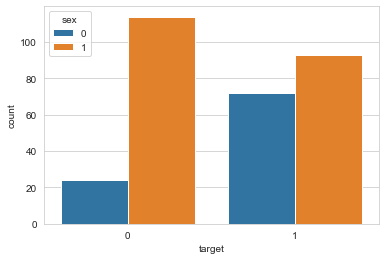

In [12]:
sns.set_style("whitegrid")
sns.countplot(x="target",data=df,hue="sex")

In [13]:
#preprocessing
from sklearn.preprocessing import StandardScaler

#get_dummies method to create dummy columns for categorical variables.
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

#standardizes a feature by subtracting the mean and then scaling to unit variance
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [14]:
#data set for test and train

y = dataset['target']
X = dataset.drop(['target'], axis = 1)

# Printing Data shape    
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (303, 30)
Y vector dimensionality: (303,)


In [25]:
# Searching for an optimal value of K for KNN
# list of scores from k_range
k_range = range(1, 21) 
# List to store scores
k_scores = []

# Looping through values of k
for k in k_range:
    # Running KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # Obtaining cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # Appending mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7455913978494624, 0.7591397849462365, 0.8120430107526883, 0.8053763440860215, 0.8348387096774192, 0.831505376344086, 0.8416129032258064, 0.8417204301075267, 0.8449462365591398, 0.8448387096774193, 0.8381720430107527, 0.8448387096774195, 0.841505376344086, 0.8415053763440861, 0.8280645161290323, 0.8381720430107527, 0.8280645161290323, 0.8249462365591398, 0.821505376344086, 0.8250537634408601]


Text(0, 0.5, 'Cross-Validated Accuracy')

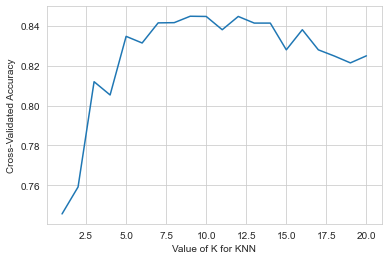

In [26]:
# Ploting the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [34]:
# Split into training dataset and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=120) 
print(y_train.head())

285    0
267    0
217    0
207    0
19     1
Name: target, dtype: int64


In [35]:
X_train.shape

(212, 30)

In [36]:
y_train.shape

(212,)

In [37]:
X_test.shape

(91, 30)

In [22]:
y_test.shape

(91,)

In [42]:
# Model Building
knn = KNeighborsClassifier(n_neighbors=12) 
# Here we can specify 4 things: n_neighbors, weights, algorithm and metric.
  
# Fitting the model
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
y_pred = knn.predict(X_test)
print(y_pred) 

[0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0]


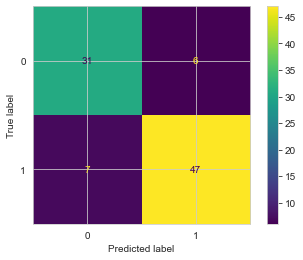

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

In [44]:
print(confusion_matrix(y_test, y_pred))

[[31  6]
 [ 7 47]]


In [45]:
import sklearn.metrics as met
print(met.accuracy_score(y_test, y_pred))

0.8571428571428571


In [46]:
print(met.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.89      0.87      0.88        54

    accuracy                           0.86        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

